In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\Users\HP\Documents\Python\NareshIT\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
# separate categorical and numerical column

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [4]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**prevailing_wage**

In [6]:
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

- count

- min

- max

- mean

- 25p

- median

- 50p

- 75p

In [7]:
wage_data=visa_df['prevailing_wage']  
wage_data  # stores all the values of the column in a series

# find len,min,max,mean,median using numpy

Count=len(wage_data) # length of the series
Min=round(np.min(wage_data),2) # minimum value in the series
Max=round(np.max(wage_data),2) # maximum value in the series
Mean=round(np.mean(wage_data),2) # mean of the series
Median=round(np.median(wage_data),2) # median of the series

# convert all these data in to a data frame
index=['Count','Min','Max','Mean','Median']
values=[Count,Min,Max,Mean,Median]
pd.DataFrame(values,index=index,columns=['prevailing_wage'])

,prevailing_wage
Count,25480.00
Min,2.14
Max,319210.27
Mean,74455.81
Median,70308.21


In [8]:
wage_data=visa_df['prevailing_wage']  
wage_data  # stores all the values of the column in a series

# find len,min,max,mean,median using pandas and 25p,50p,75p using numpy

Count=round(len(wage_data),2) # length of the series up to 2nd value
Min=round(wage_data.min(),2)  # minimum value in the series
Mean=round(wage_data.mean(),2) # median in the series
Median=round(wage_data.median(),2) # mean of the series
p_25=round(np.percentile(wage_data,50),2)
p_50=round(np.percentile(wage_data,25),2)
p_75=round(np.percentile(wage_data,75),2)
Max=round(wage_data.max(),2) # maximum value of the series

# converting all these values in to a data frame
index=['Count','Min','Mean','Median','25p','50p','75p','max']
values=[Count,Min,Mean,Median,p_25,p_50,p_75,Max]
pd.DataFrame(values,index=index,columns=['prevailing_wage'])

,prevailing_wage
Count,25480.00
Min,2.14
Mean,74455.81
Median,70308.21
25p,70308.21
50p,34015.48
75p,107735.51
max,319210.27


**percentile-quantile**

In [9]:
np.percentile(wage_data,50)

70308.20999999999

In [10]:
np.quantile(wage_data,0.5)

70308.20999999999

In [11]:
np.median(wage_data)

70308.20999999999

- 50p=70308.20999999999

- 50 percentage of total data has less than 70308.20

- 50 percentage of 25480 has less than 70308.20

- 12470 applicants has wages less than 703208.20

In [12]:
wage_data=visa_df['prevailing_wage']
p_50=np.percentile(wage_data,50) # 50p of total wage_data
con=wage_data<p_50 # condition for those values,which are less than 50p value in the wage_data series
len(visa_df[con])==50*25480/100 # checking number of applicants same or not using numpy and manual method
print("number of applicants are less than 50p:",len(visa_df[con]))

number of applicants are less than 50p: 12740


- 25p=34015.479999999996

- 25 percentage of total data has less than 34015.479999999996

- 25 percentage of 25480 has less than 34015.479999999996

- 6370 applicants has wages less than 34015.479999999996

In [13]:
wage_data=visa_df['prevailing_wage']
p_25=np.percentile(wage_data,25) # 25p of total wage_data
con=wage_data<p_25  # condition for those values,which are less than 50p value in the wage_data series
len(visa_df[con])==25*25480/100   # checking number of applicants same or not using numpy and manual method
print("number of applicants are less than 25p:",len(visa_df[con]))

number of applicants are less than 25p: 6370


- 75p=107735.51250000001

- 75 percentage of total data has less than 107735.51250000001

- 75 percentage of 25480 has less than 107735.51250000001

- 19110 applicants has wages less than 107735.51250000001


In [14]:
wage_data=visa_df['prevailing_wage']
p_75=np.percentile(wage_data,75) # 75p of total wage_data
con=wage_data<p_75  # condition for those values,which are less than 50p value in the wage_data series
len(visa_df[con])==75*25480/100  # checking number of applicants same or not using numpy and manual method
print("number of applicants are less than 75p:",len(visa_df[con]))

number of applicants are less than 75p: 19110


In [15]:
# generic formula for all numeric values

data=visa_df['prevailing_wage']
data

l=[]
for i in num:
    data=visa_df[i]
    Count=len(data)
    Min=round(data.min(),2)
    Mean=round(data.mean(),2)
    Median=round(data.median(),2)
    p_25=round(np.percentile(data,25),2)
    p_50=round(np.percentile(data,50),2)
    p_75=round(np.percentile(data,75),2)
    Max=round(data.max(),2)
    index=['Count','Min','Mean','Median','25p','50p','75p','max']
    values=[Count,Min,Mean,Median,p_25,p_50,p_75,Max]
    l.append(values)  # appending all the values(Count,Min,Mean,Median,25p,50p,75p,Max) in a list

In [16]:
l

[[25480, -26, 5667.04, 2109.0, 1022.0, 2109.0, 3504.0, 602069],
 [25480, 1800, 1979.41, 1997.0, 1976.0, 1997.0, 2005.0, 2016],
 [25480, 2.14, 74455.81, 70308.21, 34015.48, 70308.21, 107735.51, 319210.27]]

In [17]:
# creating a dataframe for all values for all numeric column
pd.DataFrame(l,index=num,columns=index).T

,no_of_employees,yr_of_estab,prevailing_wage
Count,25480.00,25480.00,25480.00
Min,-26.00,1800.00,2.14
Mean,5667.04,1979.41,74455.81
Median,2109.00,1997.00,70308.21
25p,1022.00,1976.00,34015.48
50p,2109.00,1997.00,70308.21
75p,3504.00,2005.00,107735.51
max,602069.00,2016.00,319210.27


In [18]:
# a single method to analysis all numerical column
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# 02nd July 2025

In [19]:
wage_data=visa_df['prevailing_wage']

In [20]:
wage_data.mean()==wage_data.median()

False

**Emperical Rule**

- True means follow Normal Distribution do not have any outlier.

- False means doesnot follow Normal Distribution and has outliers.

In [21]:
wage_mean=wage_data.mean() # 74455.81459209183
wage_std=wage_data.std() # 52815.94232687357
lb=wage_mean-1*wage_std  # 21639.872265218262
ub=wage_mean+1*wage_std  # 127271.7569189654
con1=wage_data>=lb   # series of prevailing_wage with True and False value
con2=wage_data<ub  # series of prevailing_wage with True and False value
con=con1 & con2  # series of prevailing_wage with True and False value
len(visa_df[con])==68*len(visa_df)/100

False

In [44]:
def Emperical_rule(k,n):
    wage_mean=wage_data.mean()
    wage_std=wage_data.std()
    lb=wage_mean-k*wage_std
    ub=wage_mean+k*wage_std
    con1=wage_data>lb
    con2=wage_data<ub
    con=con1 & con2
    print(len(visa_df[con])==n*len(visa_df)/100)

Emperical_rule(1,68)

False


<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg" id="img" style="width: 496px; height: 248px;">

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

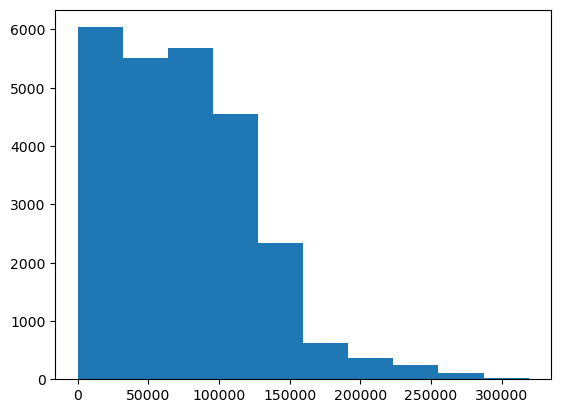

In [23]:
plt.hist(wage_data)

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

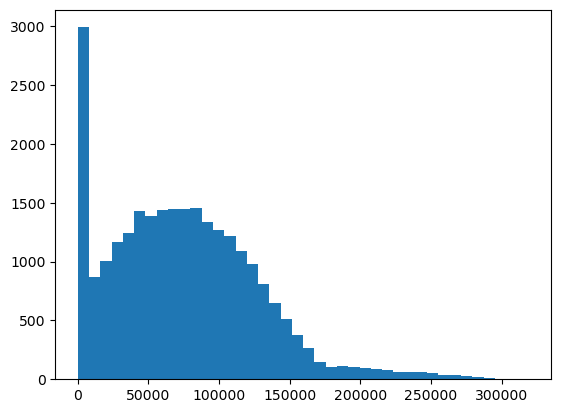

In [24]:
plt.hist(wage_data,bins=40)

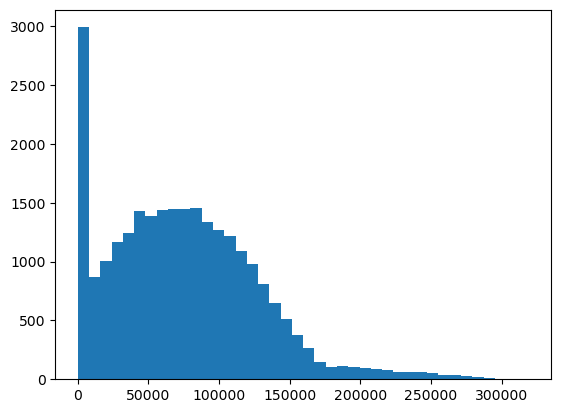

In [25]:
freq,interval,bins=plt.hist(wage_data,bins=40)

In [26]:
freq

array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
       1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
        509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
         79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
          7.,    3.,    6.,    5.])

In [27]:
interval

array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
       3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
       6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
       9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
       1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
       1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
       1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
       2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
       2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
       2.87289457e+05, 2.95269660e+05, 3.03249863e+05, 3.11230067e+05,
       3.19210270e+05])

- 2.13670000e+00, 7.98234003e+03 between these two 2992. values are present.

In [28]:
lb=2.13670000e+00 
ub=7.98234003e+03
con1=wage_data>=lb
con2=wage_data<ub
con=con1 & con2
len(wage_data[con])==2992

True

- Data skewed

- Not following Normal Distribution

- Means outliers are present.

**Outliers analysis**

$box-plot$

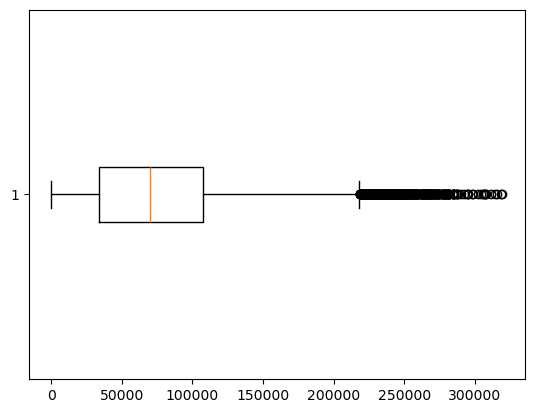

In [29]:
plt.boxplot(wage_data,vert=False)
plt.show()

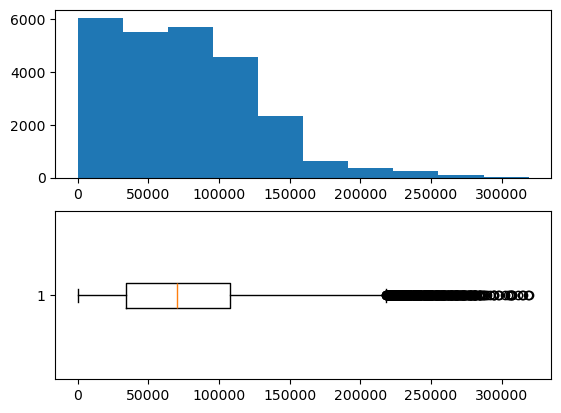

In [30]:
plt.subplot(2,1,1).hist(wage_data)
plt.subplot(2,1,2).boxplot(wage_data,vert=False)
plt.show()

**outlier**

In [ ]:
           Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


In [32]:
# checking for outliers data

q1=np.percentile(wage_data,25)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
con1=wage_data<lb
con2=wage_data>ub
con=con1 | con2
outliers_df=visa_df[con]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


{'whiskers': [<matplotlib.lines.Line2D at 0x248d0e44500>,
 'caps': [<matplotlib.lines.Line2D at 0x248d0e44a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x248d0c57dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x248d0e44fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248d0e45280>],
 'means': []}

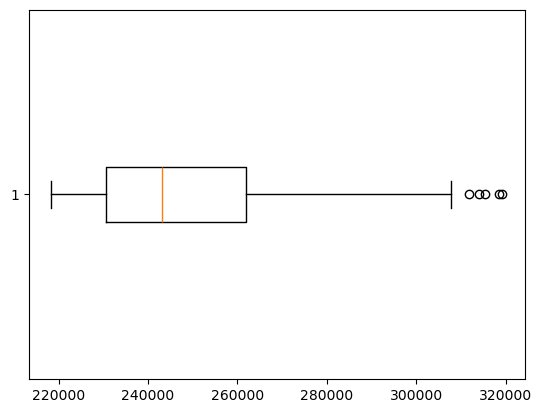

In [33]:
plt.boxplot(outliers_df['prevailing_wage'],vert=False)

In [45]:
# checking for non outlier data

q1=np.percentile(wage_data,25)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
non_outliers_df=visa_df[con]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_data_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified,51104.7800
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


{'whiskers': [<matplotlib.lines.Line2D at 0x248d125ad20>,
 'caps': [<matplotlib.lines.Line2D at 0x248d1258c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x248d1258e60>],
 'medians': [<matplotlib.lines.Line2D at 0x248d12582f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248d1258650>],
 'means': []}

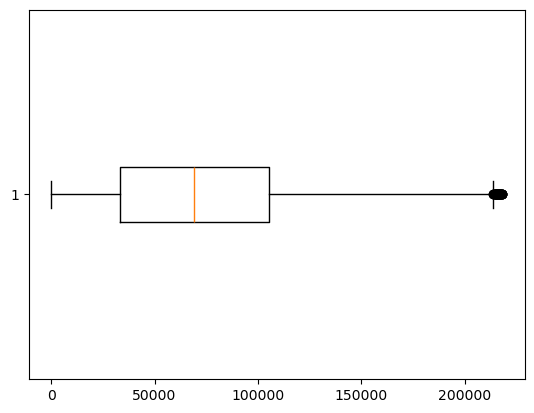

In [46]:
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False)

In [47]:
25053+427 # non_outlier_data + outlier_data === total data

25480

In [48]:
(427/25480)*100 # okay to drop <2%

1.6758241758241759

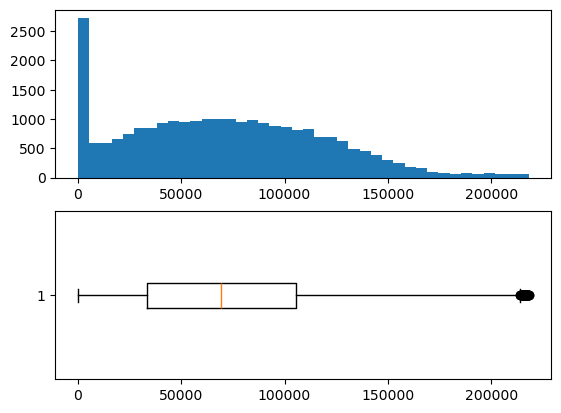

In [49]:
# histogram and boxplot for non_outlier_data

plt.subplot(2,1,1).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,1,2).boxplot(non_outliers_df['prevailing_wage'],vert=False)
plt.show()

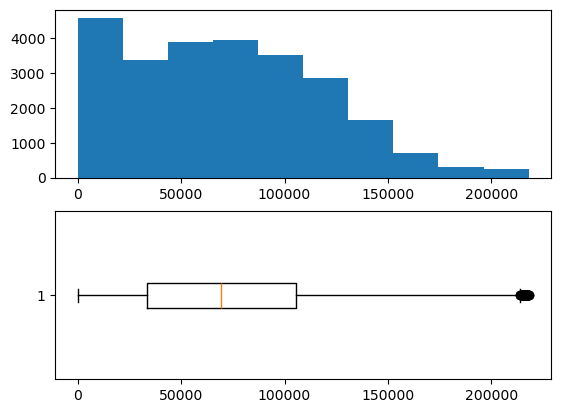

In [50]:
d=non_outliers_df['prevailing_wage']
plt.subplot(2,1,1).hist(d)
plt.subplot(2,1,2).boxplot(d,vert=False)
plt.show()

**Outlier imputation**

- Method1:

  - lessthan lb outliers impute with lb value

  - greaterthan lb outliers impute with ub value
 
- Method2:

  - Every outlier impute with median

$cap: Winsorization$

In [51]:
l=[]
for i in wage_data:
    if i<lb:
        l.append(lb)
    elif i>ub:
        l.append(ub)
    else:
        l.append(i)
visa_df['wage_data_new']=l

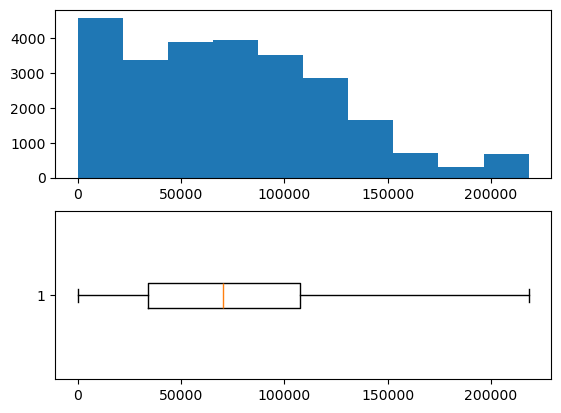

In [52]:
d=visa_df['wage_data_new']
plt.subplot(2,1,1).hist(d)
plt.subplot(2,1,2).boxplot(d,vert=False)
plt.show()

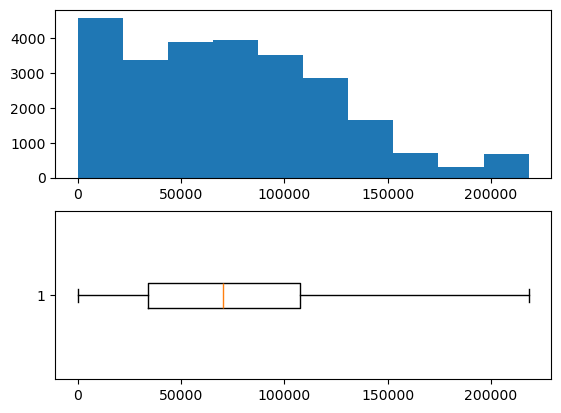

In [53]:
d=visa_df['prevailing_wage'].clip(lb,ub)
plt.subplot(2,1,1).hist(d)
plt.subplot(2,1,2).boxplot(d,vert=False)
plt.show()

**impute median**

In [54]:
d = wage_data.median()
l1 = []

for i in wage_data:
    if i < lb or i > ub:
        # medain=wage_data.median()
        l1.append(wage_data.median())
    else:
        l1.append(i)
visa_df['wage_data_new_median'] = l1

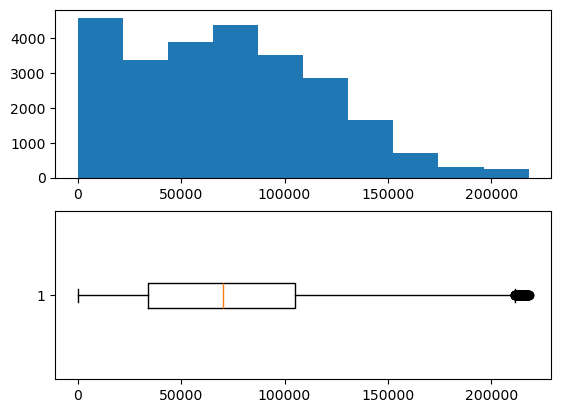

In [55]:
d=visa_df['wage_data_new_median']
plt.subplot(2,1,1).hist(d)
plt.subplot(2,1,2).boxplot(d,vert=False)
plt.show()

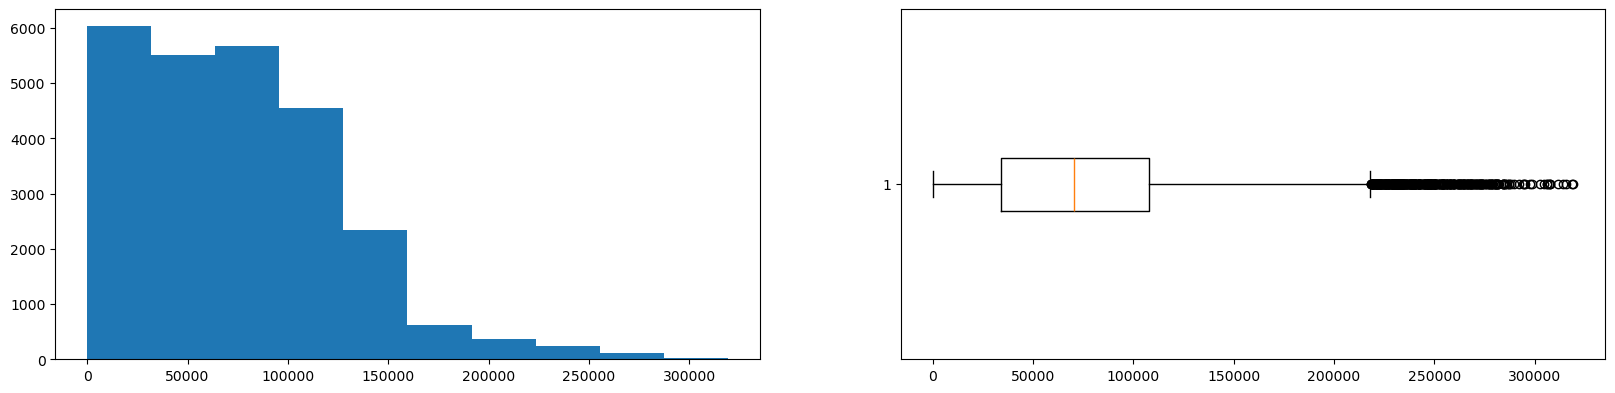

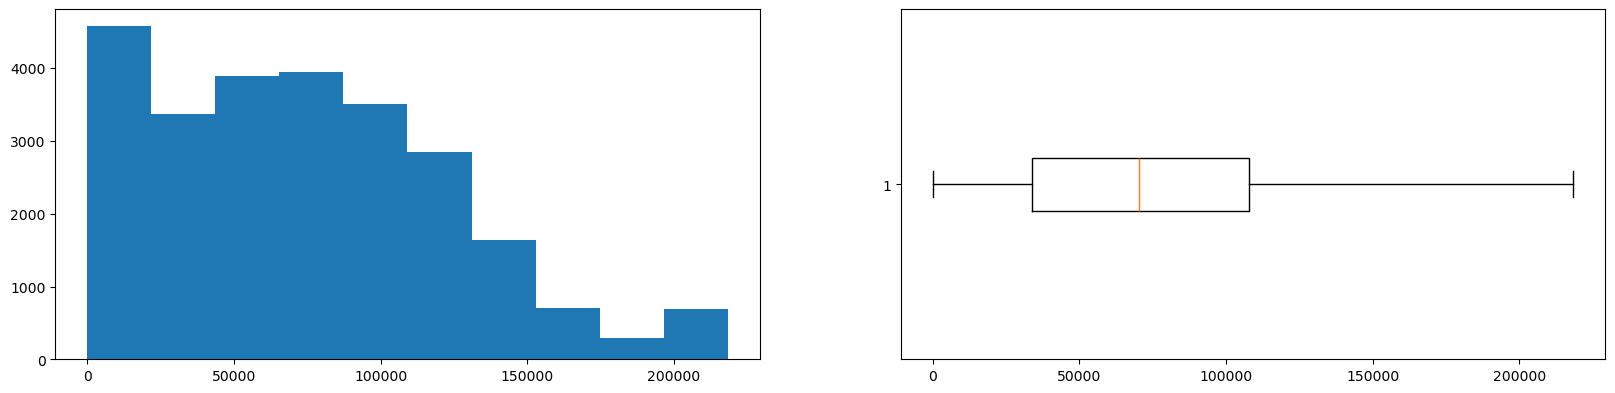

In [56]:
wage_data=visa_df['prevailing_wage'] # total data
non_outliers_df['prevailing_wage']  # non outliers data

# histogram and boxplot of total data 

plt.figure(figsize=(20,10))
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.show()

# histogram and boxplot for non_outlier_data

plt.figure(figsize=(20,10))
d=visa_df['wage_data_new'] # here wage_data_new is the winsorization data
plt.subplot(2,2,3).hist(d)
plt.subplot(2,2,4).boxplot(d,vert=False)
plt.show()

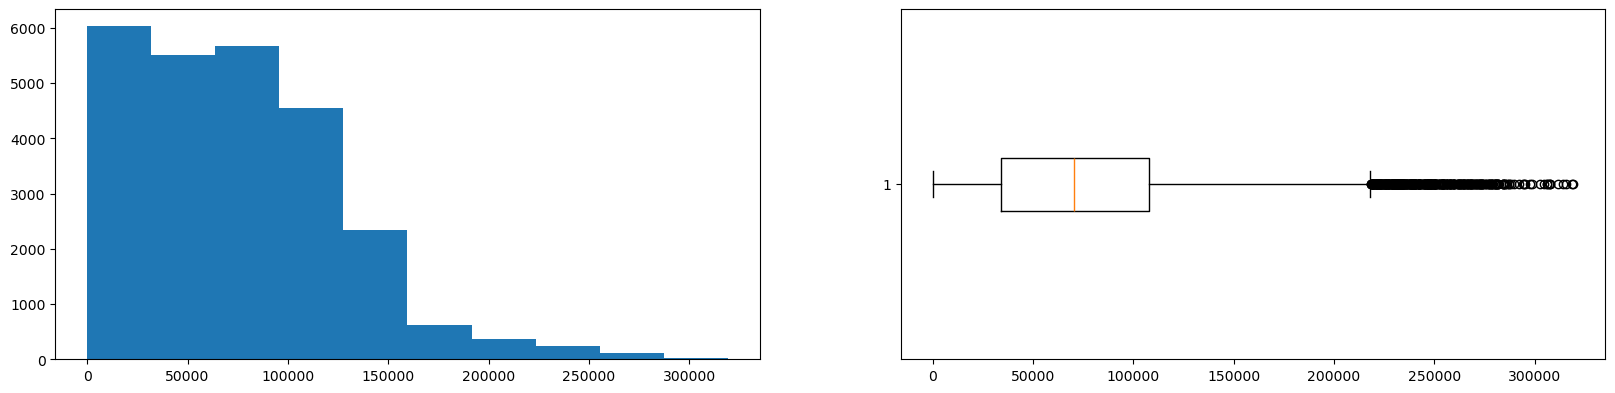

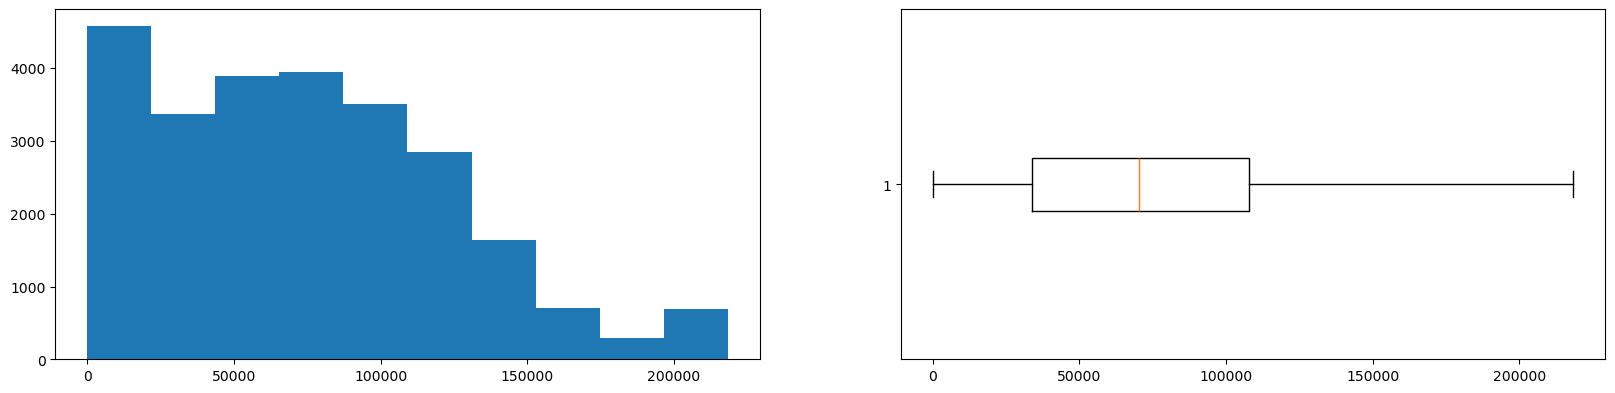

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.show()

plt.figure(figsize=(20,10))
d=visa_df['prevailing_wage'].clip(lb,ub)
plt.subplot(2,2,3).hist(d)
plt.subplot(2,2,4).boxplot(d,vert=False)
plt.show()

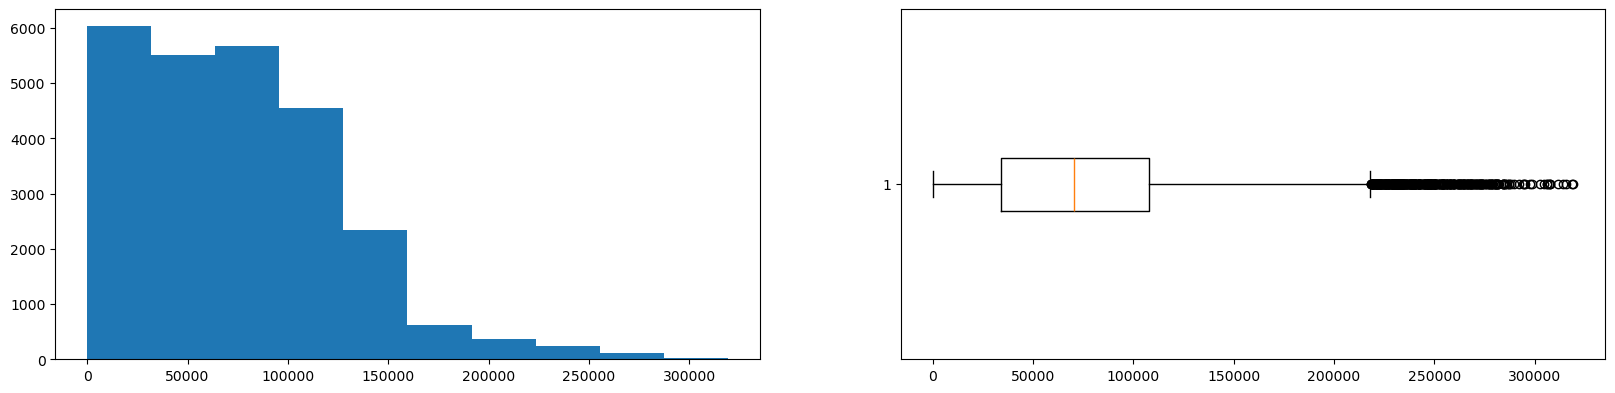

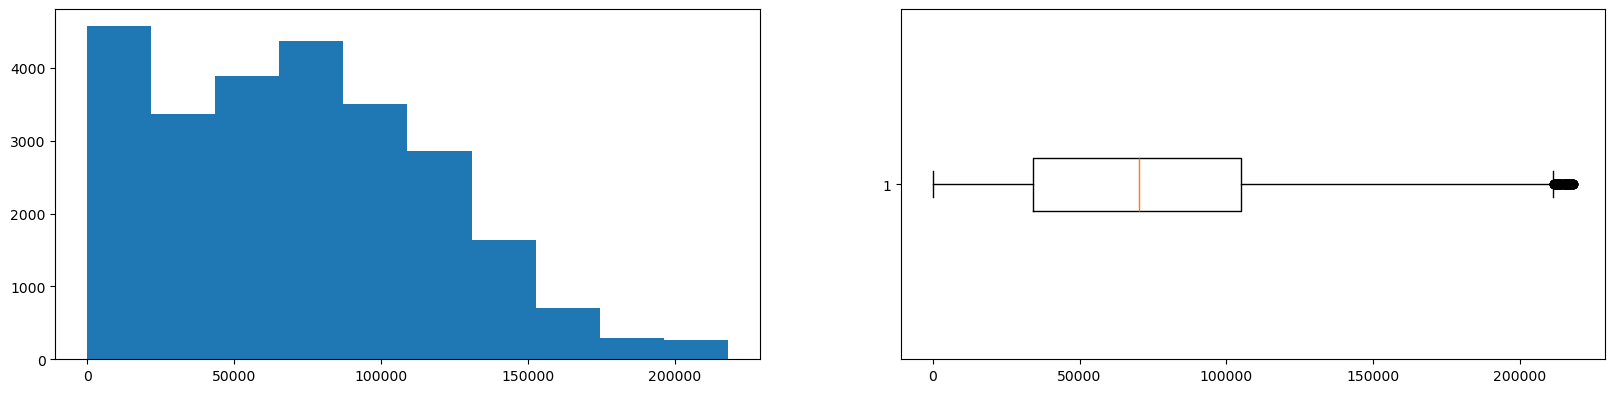

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.show()

plt.figure(figsize=(20,10))
d=visa_df['wage_data_new_median']
plt.subplot(2,2,3).hist(d)
plt.subplot(2,2,4).boxplot(d,vert=False)
plt.show()